In [31]:
from qiskit import *

In [41]:
def szegedy(circuit):
    qr = circuit.qubits
    
    circuit.x([qr[5],qr[4], qr[3]]) #for the negative controlled gates
    circuit.barrier()
    
    #L^4
    circuit.mct([qr[4],qr[3], qr[2]], qr[5],None, mode='advanced')
    circuit.ccx(qr[2], qr[3], qr[4])
    circuit.cx(qr[2], qr[3])
    circuit.barrier()
    
    #L^2
    circuit.ccx(qr[2], qr[3], qr[4])
    circuit.cx(qr[2], qr[3])
    circuit.barrier()
    
    #L
    circuit.cx(qr[2], qr[3])
    circuit.barrier()
    
    circuit.x([qr[5],qr[4], qr[3]]) #for the negative controlled gates
    circuit.barrier()

    # multiple target negative controlled not
    circuit.x(qr[3])
    circuit.cx(qr[3], qr[4])
    circuit.x(qr[3])
    circuit.barrier()

    # multi controlled Z rotation
    circuit.h(qr[3])
    circuit.mcrz(180,[qr[4],qr[3]], qr[5])
    circuit.h(qr[3])

    circuit.barrier()

    # multiple target negative controlled not
    circuit.x(qr[3])
    circuit.cx(qr[3], qr[4])
    circuit.x(qr[3])
    circuit.barrier()

    #R^4
    circuit.mct([qr[4],qr[3], qr[2]], qr[5],None, mode='advanced')
    circuit.ccx(qr[2], qr[3], qr[4])
    circuit.cx(qr[2], qr[3])
    circuit.barrier()
    
    #R^2
    circuit.ccx(qr[2], qr[3], qr[4])
    circuit.cx(qr[2], qr[3])
    circuit.barrier()
    
    #R
    circuit.cx(qr[2], qr[3])
    circuit.barrier()

    # swap operator
    circuit.swap(qr[5], qr[2])
    circuit.swap(qr[4], qr[1])
    circuit.swap(qr[3], qr[0])

In [47]:
qr = QuantumRegister(6)
cr = ClassicalRegister(3)

circuit = QuantumCircuit(qr, cr)

# state preparation for the Cyclic graph
circuit.h(qr[3])
circuit.cx(qr[3], qr[4])
circuit.x(qr[5])
circuit.barrier()

szegedy(circuit)

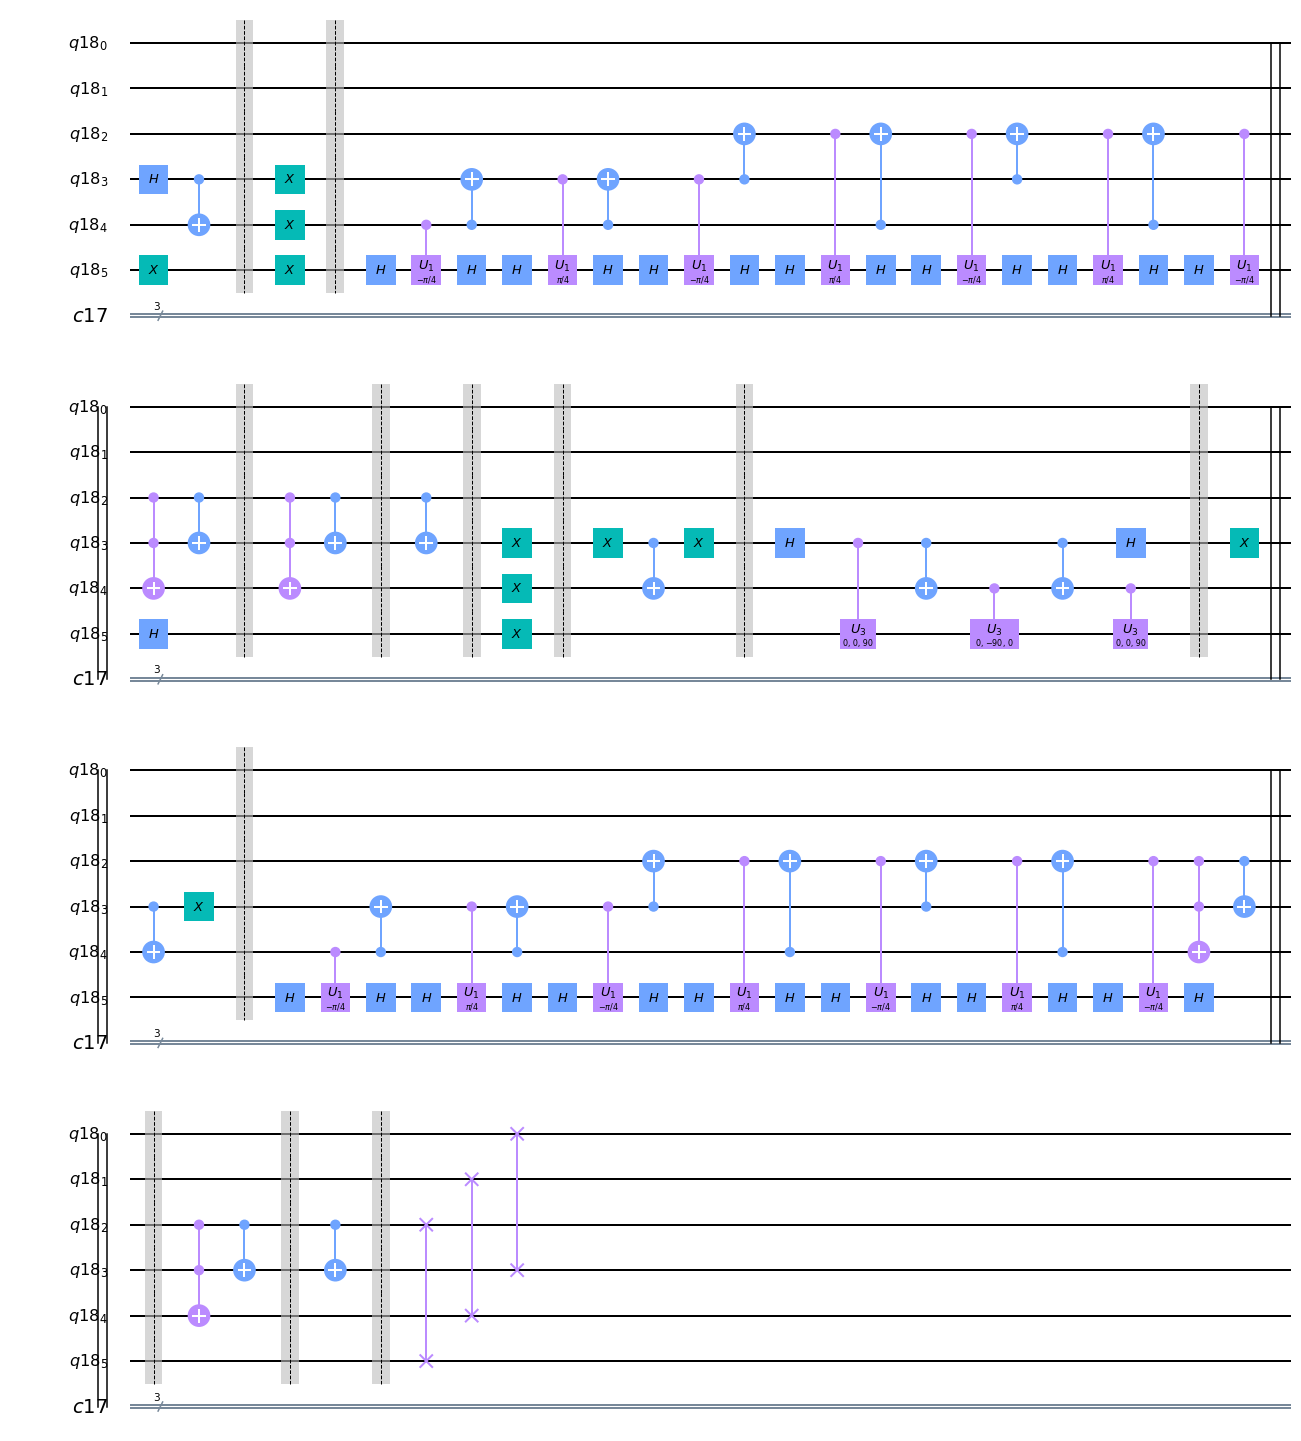

In [48]:
circuit.draw(output='mpl')

In [49]:
circuit.measure(qr[0:3], cr)

#simulate the circuit
simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit, simulator).result()

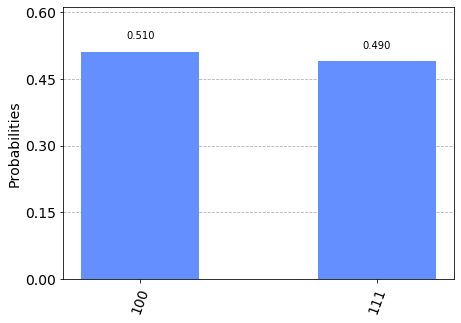

In [51]:
# show result
from qiskit.tools.visualization import plot_histogram, plot_circuit_layout
plot_histogram(result.get_counts(circuit))